In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv("C:\\Users\\abdel\\Desktop\\classification\\cls.csv",names=["Exam 1","Exam 2", 
"admitted"])
print(data.head(10))

      Exam 1     Exam 2  admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1


In [21]:
print(data["Exam 1"].head(10))

0    34.623660
1    30.286711
2    35.847409
3    60.182599
4    79.032736
5    45.083277
6    61.106665
7    75.024746
8    76.098787
9    84.432820
Name: Exam 1, dtype: float64


In [4]:
positive=data[data["admitted"].isin([1])]
negative=data[data["admitted"].isin([0])]

Text(0, 0.5, 'Exam 2')

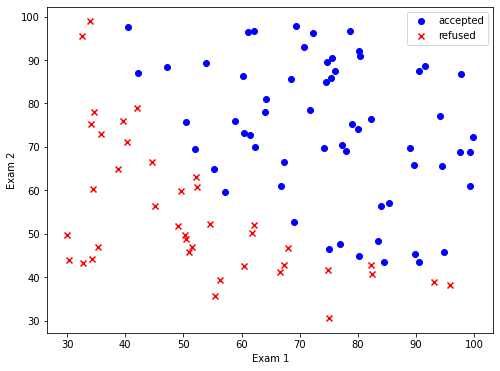

In [5]:
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(positive["Exam 1"],positive["Exam 2"],c="b",marker="o",label="accepted")
ax.scatter(negative["Exam 1"],negative["Exam 2"],c="r",marker="x",label="refused")
leg=ax.legend()
ax.set_xlabel("Exam 1")
ax.set_ylabel("Exam 2")

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

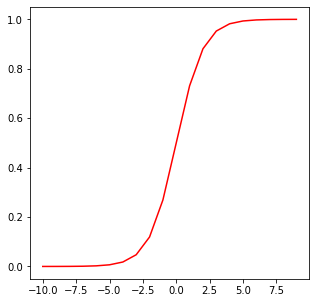

In [7]:
nums=np.arange(-10,10) 
fig,ax=plt.subplots(figsize=(5,5)) 
ax.plot(nums,sigmoid(nums),c="r")

In [8]:
data.insert(0,"one",1)

In [9]:
cols=data.shape[1]
x=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols] 

In [10]:
x=np.matrix(x.values)
y=np.matrix(y.values)
theta=np.matrix(np.zeros(3))
 

In [11]:
def cost(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(x * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(x * theta.T)))
    return np.sum(first - second) / (len(x))

print("cost is",cost(theta,x,y))


cost is 0.6931471805599453


In [14]:
def gradient(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = theta.shape[1]
    grad = np.zeros(parameters)
    
    error = sigmoid(x * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, x[:,i])
        grad[i] = np.sum(term) / len(x)
    
    return grad

import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))
print(result)



(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)


In [13]:
print("after optimizing",cost(result[0],x,y))

after optimizing 0.20349770158947447
